# CS105 Mini-Project

For this project, we designed and conducted a survey targeting students from CS105, CS111, and CS010C classes to examine their caffeine consumption. Our objective was to gain insight into their daily habits, and to see if we could extrapolate any interesting conclusions from our data.

## What is our data about?

Our data focuses on students' caffeine consumption and its relationship to their lifestyle and health habits. It includes information on how frequently students consume caffeine, their preferred sources (such as coffee, energy drinks, or tea), and additional factors like sleep patterns, energy levels throughout the day, and other health-related behaviors. By analyzing this data, we aim to uncover connections between caffeine use and students' overall well-being, examining how it influences their sleep quality, daily energy levels, and possibly other health impacts.

## What would we like to know about our data?

We aim to learn how caffeine consumption affects students' daily routines, particularly regarding their sleep quality, energy levels, and overall health. By examining the frequency and sources of caffeine intake, along with lifestyle factors like sleep habits and other health behaviors, we hope to identify patterns that may reveal how caffeine influences students' physical and mental well-being. Additionally, we want to see if there are any notable trends among students in terms of their dependency on caffeine for focus and energy, helping us better understand the potential impacts of caffeine on their academic and personal lives.

## Data Exploration/Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency, chi2, pearsonr

df = pd.read_csv("data/CleanedResponses.csv")

### Is there an association between how often students consume caffine and their academic standing?

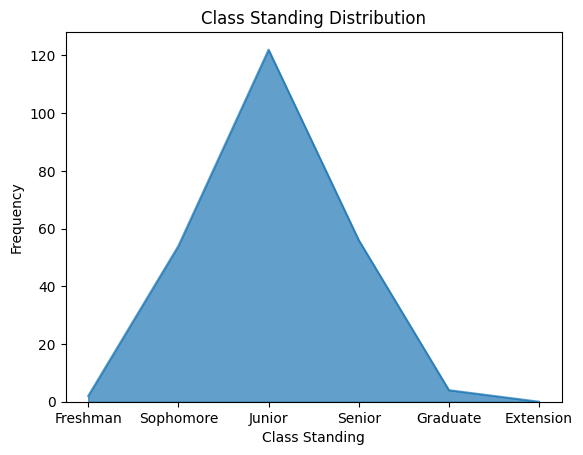

In [2]:
class_counts = df['classStanding'].value_counts()

class_order = ["Freshman", "Sophomore", "Junior", "Senior", "Graduate", "Extension"]
class_counts = class_counts.reindex(class_order)

class_counts.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Class Standing Distribution')
plt.xlabel('Class Standing')
plt.ylabel('Frequency')
plt.show()

This stacked area graph visualization illustrates the distribution of class standings among students in the CS010C, CS111, and CS105 courses who participated in the survey. Juniors dominate the participant pool, representing just around 120 responses. Seniors and sophomores follow, comprising about 60 responses each, with seniors being a little higher. The Freshman, Graduate, and Extension students, collectively accounts for the remaining participants, with a few for each category. The stacked area chart helps show how each class standing contributes to the total survey population, with a clear emphasis on juniors as the largest group.

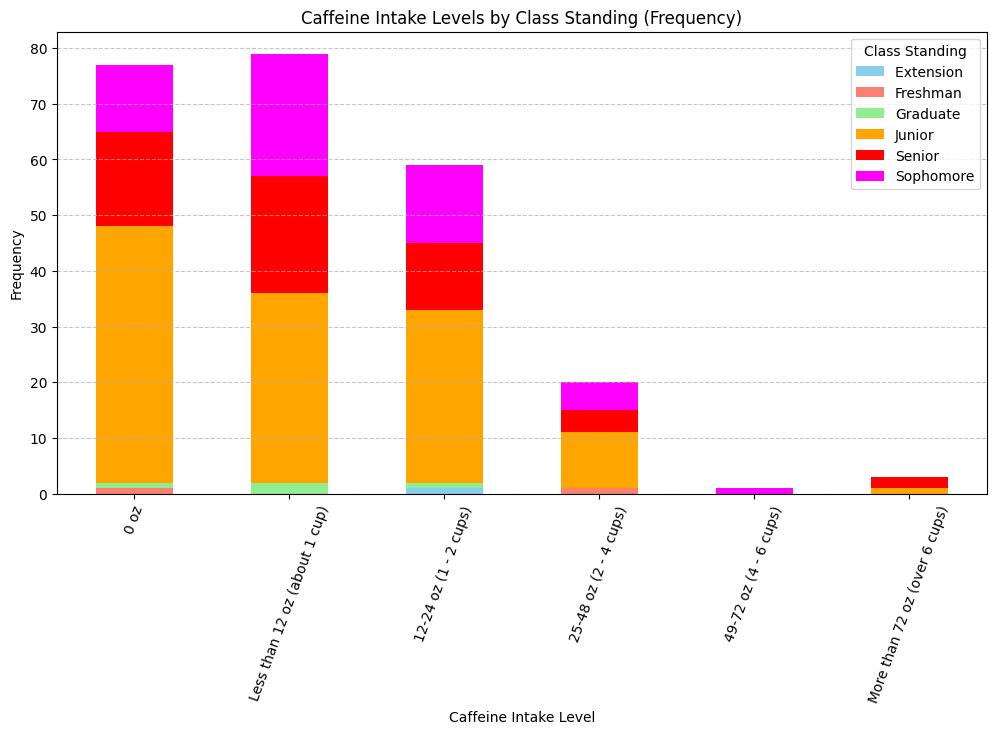

In [3]:
caffeine_counts = pd.crosstab(df['caffeineIntake'], df['classStanding'])

intake_order = ["0 oz", "Less than 12 oz (about 1 cup)", "12-24 oz (1 - 2 cups)", "25-48 oz (2 - 4 cups)", "49-72 oz (4 - 6 cups)", "More than 72 oz (over 6 cups)"]
caffeine_counts = caffeine_counts.loc[intake_order]

caffeine_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon', 'lightgreen', 'orange', 'red', 'magenta'])

plt.title('Caffeine Intake Levels by Class Standing (Frequency)')
plt.xlabel('Caffeine Intake Level')
plt.xticks(rotation=70)
plt.ylabel('Frequency')
plt.legend(title="Class Standing")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The stacked bar graph above compares students' caffeine intake levels with their academic standing. While juniors appear to have the highest caffeine consumption, this aligns with the previous stacked area chart showing that juniors made up the largest proportion of survey participants. Similarly, the "Extension," "Graduate," and "Freshman" categories have a smaller representation, which can also be seen through the stacked area graph.

The stacked bar graph reveals that most students consume no more than four cups of caffeine, with very few students drinking between 2-4 cups. A fair number of students report an intake of 1-2 cups, while those who do not consume caffeine or have only one cup form nearly equal groups, both slightly larger than the 1-2 cup category. Overall, the distribution appears balanced across academic standings, given the higher participation of juniors and the smaller numbers for freshmen, extension, and graduate students.

#### Hypothesis: There is no association between a student's class standing and their caffine intake level

I will be using the Chi-Square test to test my hypothesis to check if these two variables are independent are not. 

In [4]:
caffeine_counts = pd.crosstab(df['caffeineIntake'], df['classStanding'])

chi, p, dfree, expected = chi2_contingency(caffeine_counts)
print("Calculated chi square value:", chi)
print("Calculated p value:", p)
print("Degrees of freedom:", dfree)

significance_level = 0.05
critical_value = chi2.ppf(1 - significance_level, dfree)
print(f"Critical value for {dfree} degrees of freedom at the 0.05 significance level:", critical_value)

if chi > critical_value:
    print("Reject the null hypothesis: there is a significant association between caffeine intake and class standing.")
else:
    print("Fail to reject the null hypothesis: no significant association found between caffeine intake and class standing.")

Calculated chi square value: 21.667691157763443
Calculated p value: 0.6548528883879965
Degrees of freedom: 25
Critical value for 25 degrees of freedom at the 0.05 significance level: 37.65248413348277
Fail to reject the null hypothesis: no significant association found between caffeine intake and class standing.


Based on the results of our Chi-Square test, we calculated a chi-square value of approximately 22. Comparing this to the critical value of approximately 38 at a 0.05 significance level, we find that our chi-square value is smaller than the critical value. Therefore, we fail to reject the null hypothesis, suggesting that there is no significant association between caffeine intake and class standing. This outcome is consistent with our initial hypothesis.

### Is there a relationship between gender and preference for types of caffeinated beverages?

We are interested in the relationship between gender and preference for types of caffeinated beverages. So we plan to conduct a chi-square test.

#### Hypothesis: There is no correlation between gender and preference in caffeinated beverages

Null hypothesis: two attributes, gender and type of caffeinated drink are independent.

Alternative Hypothesis: two attributes, gender and type of caffeinated drink are correlated.

In [5]:
responses = df.copy()
responses["caffeineType"] = responses['caffeineType'].fillna('None')
df_gender_type = responses[['gender', 'caffeineType']]
type_gender = pd.crosstab(df_gender_type["caffeineType"], df_gender_type["gender"])
type_gender

gender,Female,Male,Non-binary,Prefer not to say,Transfem
caffeineType,,,,,
Coffee,11,23,0,0,0
"Coffee, Energy drink",4,14,0,0,0
Energy drink,5,19,0,0,0
"Energy drink, Matcha",0,1,0,0,0
"Energy drink, None",0,1,0,0,0
"Energy drink, soda",0,0,1,0,0
None,12,45,0,3,0
Other,3,4,0,0,0
Tea,8,14,0,1,1


In [6]:
# calculate the chi-square value of the dataset
chi, p, dfree, expected = chi2_contingency(type_gender)

print("Calculated chi square value: ", chi)
print("Calculated p value: ", p)
print("Degrees of freedom: ", dfree)

Calculated chi square value:  117.58993106742544
Calculated p value:  1.2962884266012364e-05
Degrees of freedom:  60


In [7]:
# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
print("For 60 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 60)

For 60 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:


np.float64(79.08194448784874)

The chi-squared value we calculated is 117.59. The p value is 1.296. The degree of freedom is 60. We choose the significance level alpha to be 0.05. The critical value we calculated is 79.08

Since the chi-squared value 117.59 is greater than the critical value 79.08, we reject the null hypothesis. This means that gender and type of caffeinated drink are correlated.

Now that we know there is a relationship between gender and preference for types of caffeinated beverages, we want to understand the nature of this relationship more deeply. So, we have created a heatmap.

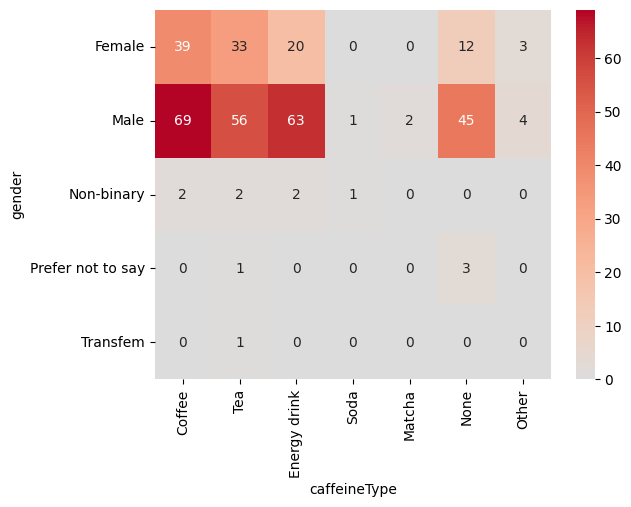

In [8]:
gender_type = pd.crosstab(df_gender_type["gender"], df_gender_type["caffeineType"])
gender_type_cleaned = gender_type.copy()
gender_type_cleaned["Coffee"] = gender_type_cleaned["Coffee"] + gender_type_cleaned["Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"]
gender_type_cleaned["Tea"] = gender_type_cleaned["Tea"] + gender_type_cleaned["Tea, Coffee"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"] + gender_type_cleaned["Tea, Energy drink"] + gender_type_cleaned["Tea, Energy drink, Soda"] + gender_type_cleaned["Tea, Matcha"] + gender_type_cleaned["Tea, pre-workout"]
gender_type_cleaned["Energy drink"] = gender_type_cleaned["Energy drink"] + gender_type_cleaned["Coffee, Energy drink"] + gender_type_cleaned["Energy drink, Matcha"] + gender_type_cleaned["Energy drink, None"] + gender_type_cleaned["Energy drink, soda"] + gender_type_cleaned["Tea, Coffee, Energy drink"] + gender_type_cleaned["Tea, Coffee, Energy drink, that is when i do drink it from some reason (btw)"] + gender_type_cleaned["Tea, Energy drink"] + gender_type_cleaned["Tea, Energy drink, Soda"]
gender_type_cleaned["Soda"] = gender_type_cleaned["Energy drink, soda"] + gender_type_cleaned["Tea, Energy drink, Soda"]
gender_type_cleaned["Matcha"] = gender_type_cleaned["Energy drink, Matcha"] + gender_type_cleaned["Tea, Matcha"]
gender_type_cleaned = gender_type_cleaned[["Coffee", "Tea", "Energy drink", "Soda", "Matcha", "None", "Other"]]
gender_type_cleaned

sns.heatmap(gender_type_cleaned, center= 0, cmap = "coolwarm",annot= True)
plt.show()

This heatmap displays the distribution of caffeine preferences among different gender identities. We can see that firstly, there is a large discrepancy between the number of female participants versus male participants. Also, it seems that a larger proportion of our female participants consume caffeine at all, compared to our male participants. Otherwise, among males, there is a fairly even distribution between the popular choices of caffeinated drinks, while in the female distribution, there is a higher preference for tea and coffee, leaving energy drinks lower on the distribution. However, to see if either gender shows a true bias towards a certain type, we must look further. So, we have created a stacked bar chart to analyze the proportions of each distribution.

In [9]:
gender_counts = gender_type_cleaned.sum(axis=1)
type_given_gender = gender_type_cleaned.divide(gender_counts, axis=0)
type_given_gender

caffeineType,Coffee,Tea,Energy drink,Soda,Matcha,None,Other
gender,,,,,,,
Female,0.364486,0.308411,0.186916,0.000000,0.000000,0.11215,0.028037
Male,0.287500,0.233333,0.262500,0.004167,0.008333,0.18750,0.016667
Non-binary,0.285714,0.285714,0.285714,0.142857,0.000000,0.00000,0.000000
Prefer not to say,0.000000,0.250000,0.000000,0.000000,0.000000,0.75000,0.000000
Transfem,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000


<Axes: xlabel='gender'>

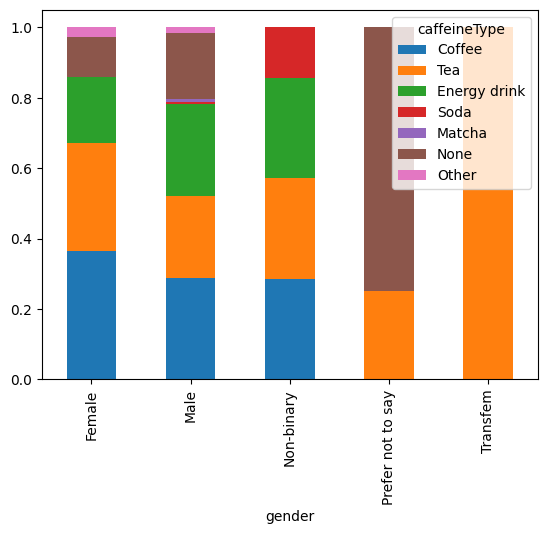

In [10]:
type_given_gender.plot.bar(stacked=True)

This graph displays the conditional distribution of the type of caffeinated drink, given the gender. From this, we can see that different genders have different preferences for types of caffeinated beverages. We observe that female participants have a higher proportion of consuming coffee and tea compared to male participants. Conversely, male participants have a higher proportion of consuming energy drinks and not consuming any caffeine compared to female participants. We can conclude that female participants tend to prefer consuming caffeinated beverages, particularly coffee and tea, while male participants show a greater preference for consuming energy drinks than female participants.

### Is there a correlation between caffeine intake and daily energy levels?

Correlation coefficient (Caffeine Intake vs Energy Levels): -0.30
p-value: 0.0000
The correlation is statistically significant.


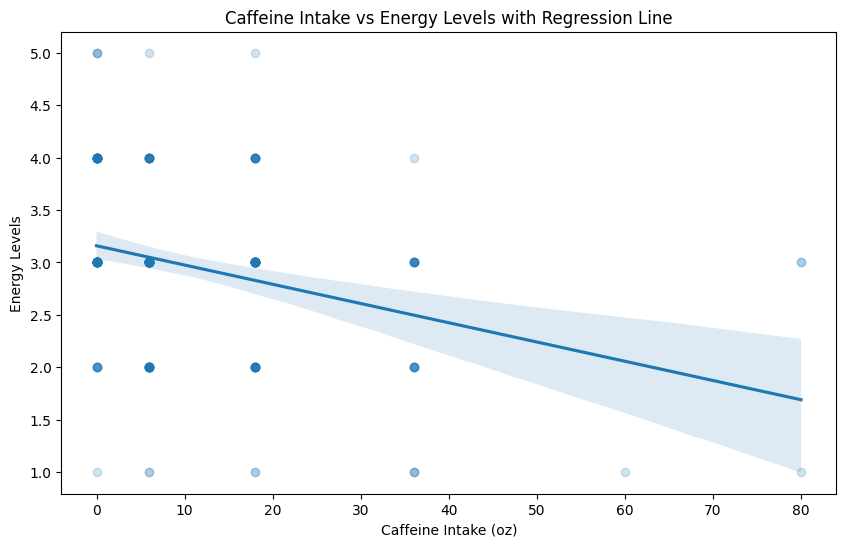

In [11]:
caffeine_amount_map = {
    "Less than 12 oz (about 1 cup)": 6,
    "12-24 oz (1 - 2 cups)": 18,
    "25-48 oz (2 - 4 cups)": 36,
    "49-72 oz (4 - 6 cups)": 60,
    "More than 72 oz (over 6 cups)": 80,
    "0 oz": 0
}
# Apply map to convert caffeineIntake to numeric values
df['caffeineIntake'] = df['caffeineIntake'].map(caffeine_amount_map)
# Create cleaned DataFrame without NaN values
df_cleaned = df.dropna(subset=['caffeineIntake', 'energyLevels'])
corr_caffeine_energy, p_value = pearsonr(df_cleaned['caffeineIntake'], df_cleaned['energyLevels'])
print(f'Correlation coefficient (Caffeine Intake vs Energy Levels): {corr_caffeine_energy:.2f}')
print(f'p-value: {p_value:.4f}')
if p_value <= 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")
plt.figure(figsize=(10, 6))
sns.regplot(x='caffeineIntake', y='energyLevels', data=df_cleaned, scatter_kws={'alpha':0.2})
plt.title('Caffeine Intake vs Energy Levels with Regression Line')
plt.xlabel('Caffeine Intake (oz)')
plt.ylabel('Energy Levels')
plt.show() 

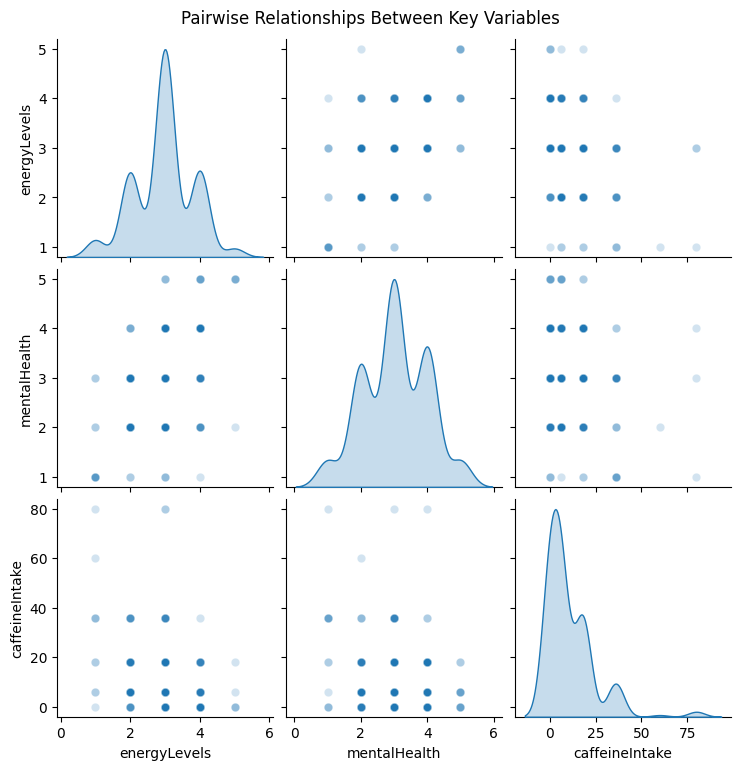

In [12]:
df_pairplot = df[['hrsSleep', 'energyLevels', 'mentalHealth', 'caffeineIntake']]
sns.pairplot(df_pairplot, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.suptitle("Pairwise Relationships Between Key Variables", y=1.02)  # Adjust title position
plt.show()

### Is there a relationship between the frequency at which one consumes caffeine and their mental health/energy levels?

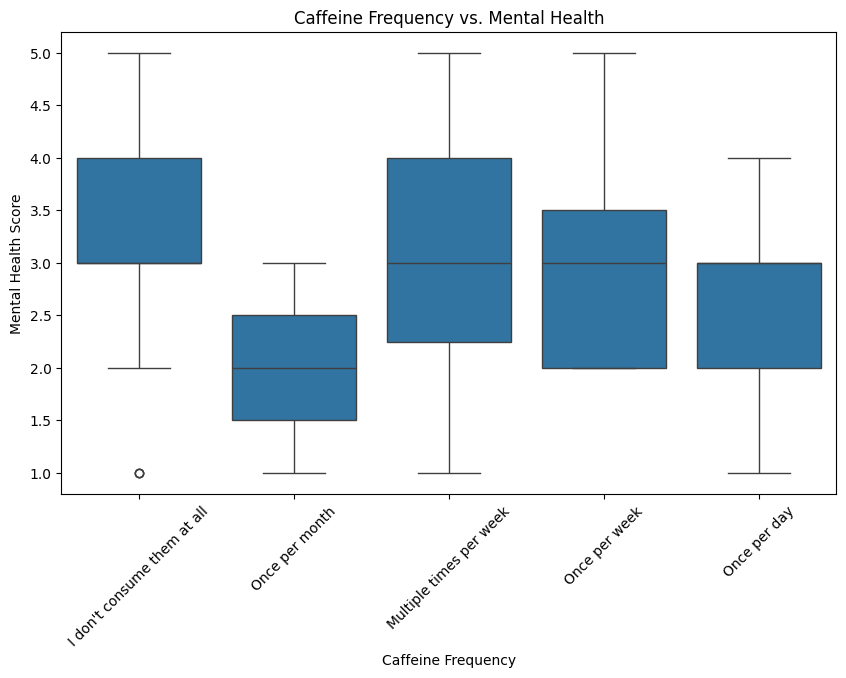

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='caffeineFreq', y='mentalHealth', data=df, order=["I don't consume them at all", "Once per month", "Multiple times per week", "Once per week", "Once per day"])
plt.title('Caffeine Frequency vs. Mental Health')
plt.xlabel('Caffeine Frequency')
plt.ylabel('Mental Health Score')
plt.xticks(rotation=45)
plt.show()

1) No caffeine: Students who skip caffeine have some of the highest and most stable mental health scores. Their scores don’t fluctuate as much, and they’re generally on the positive side, suggesting that avoiding caffeine could be connected to feeling better mentally.

2) Once per month: This group has a lower median mental health score of around 2. Their scores range from 1.5 to about 2.5, showing generally lower and more consistent mental health levels.

3) Once per week: This group has a median mental health score of 3, with most scores ranging between 2 and 3.5. This indicates a moderate and balanced mental health level among this group.

4) Multiple times per week: This group has a median mental health score of 3, similar to the once per week group. However, their scores vary widely from 2.2 to 4, indicating more fluctuation in mental health levels.

5) Once per day: This group has a median of 3. Their scores range from 2 to about 3, indicating moderately variable but generally lower mental health levels.

From what we see in here, it looks like students who drink caffeine frequently (especially multiple times a week) might experience lower mental health on average, while those who don’t consume caffeine tend to report feeling better. It’s an interesting pattern that suggests there might be a connection between how often students drink caffeine and how they feel mentally.

Making a horizontal bar chart can reveal if certain types of caffeine (like coffee, tea, energy drinks) are linked with different amounts of sleep, which is critical to well being. so I’ll plot the average sleep hours for each caffeine type.

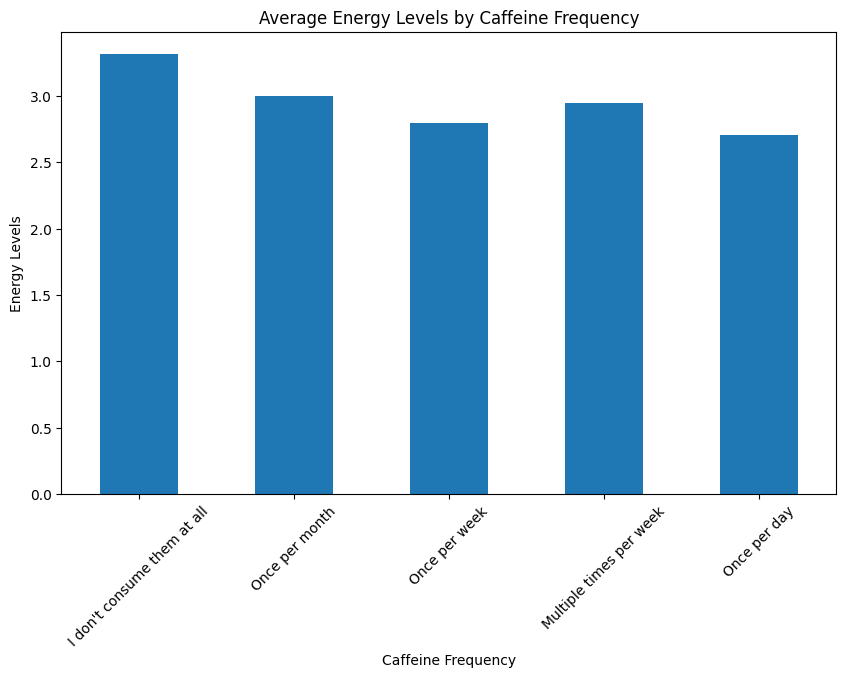

In [14]:
caffeine_freq_energy = df.groupby('caffeineFreq')['energyLevels'].mean()
caffeine_freq_energy = caffeine_freq_energy.loc[["I don't consume them at all", "Once per month", "Once per week", "Multiple times per week", "Once per day"]]

plt.figure(figsize=(10, 6))
caffeine_freq_energy.plot(kind='bar')
plt.title('Average Energy Levels by Caffeine Frequency')
plt.xlabel('Caffeine Frequency')
plt.ylabel('Energy Levels')
plt.xticks(rotation=45)
plt.show()

1) No caffeine: This group has the highest average energy levels. It might imply that a natural energy baseline, without the influence of caffeine, leads to more stable energy throughout the day.

2) Once per month: This group reports relatively high energy levels, meaning that very infrequent caffeine intake might give an energy boost without reducing baseline energy.

3) Multiple times per week: This group has moderately higher energy levels compared to daily consumers and those who drink caffeine once per week. It is possible that students consuming caffeine multiple times a week maintain a balance where they get a periodic boost without the negatives of daily use.

4) Once per week: This group reports slightly higher energy levels than daily consumers. This might mean that a less frequent intake allows the body to respond better to caffeine’s effects without experiencing significant loss in energy.

5) Once per day: This group has the lowest average energy levels. It seems that daily caffeine consumption may not be providing a sustainable energy boost, leading to dependency that leaves students feeling less energetic overall.

Overall, this visualization shows that students who either avoid caffeine or consume it very infrequently report the highest energy levels. Regular caffeine intake, especially daily, seems to correlate with lower energy levels.


## Conclusions

THIS IS FOR RICHARD